# Two visualizations of the unclustered data


Hierachical needs distances
Distance of Df, and Ds of the KS algorithm, either sepperatly or combine them somehow (addition?)

In [1]:
import numpy as np
import os
%matplotlib inline 
from matplotlib import pyplot as plt

# Functions for easier folder access

In [2]:
dirName = '/home/dennis/data/data_usb/P5-Clustering/GygiAnalysis/'
def getData(folderName):
    npzfilename=os.path.join(dirName + folderName,'rawFeatures.npz')
    dataRaw= np.load(npzfilename) 
    dataRaw=dataRaw['arr_0'].item()
    #dataraw.keys()
    return dataRaw

def compareData(nameFirst, nameSecond, attribute):
    arrayFirst = getData(nameFirst)[attribute]
    arraySecond = getData(nameSecond)[attribute]
    ks, p = stats.ks_2samp(arrayFirst.ravel(), arraySecond.ravel())
    return ks

def getDirList(inputBool):
    exclude = ['GygiDataAnalysis_PT', 'GygiDataAnalysis_TN', 'GygiDataAnalysis_PN', 'GygiDataAnalysis2DManual', '.ipynb_checkpoints']
    dirList = []
    for name in os.listdir(dirName):
        if os.path.isdir(os.path.join(dirName, name)):
            if name not in exclude:
#                 print name
                dirList.append(name)
    dirList.sort()
    if inputBool:
        return dirList[0:10]
    else:
        return dirList

# Visualizations

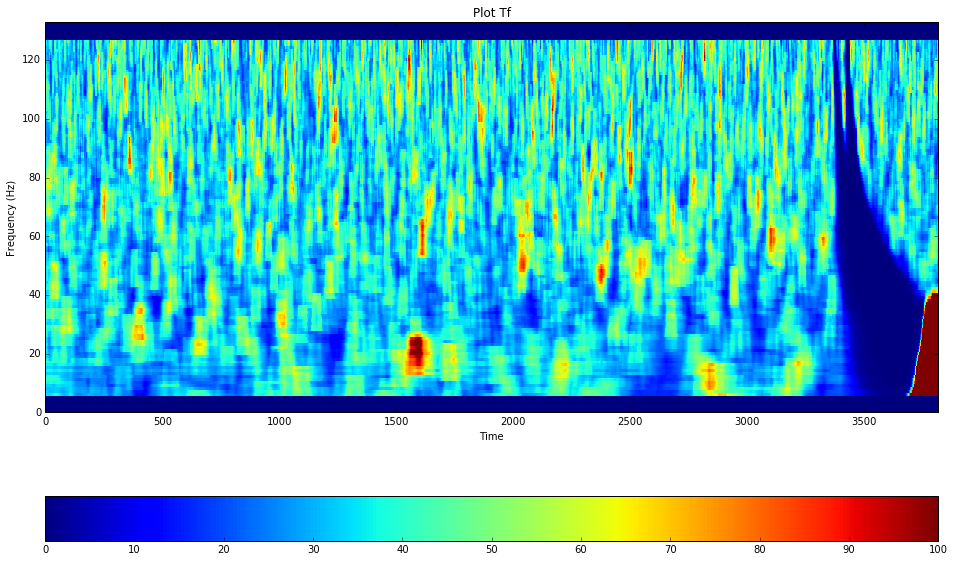

(133, 3816)


1240.2607913994066

In [3]:
array = getData('gun')
array = array['Tf']

fig = plt.figure(figsize=(16,10,))
ax = fig.add_subplot(1,1,1)
img = ax.imshow(array, interpolation='nearest',aspect='auto', vmin = 0, vmax=100)
plt.title('Plot Tf')
plt.xlabel('Time')
plt.ylabel('Frequency (Hz)')
plt.colorbar(img, orientation='horizontal')
plt.ylim(0, 133) #Flipping Y so that 0 is at the bottom
plt.show()

#tijd is X, freq is Y, color is intensity van 0 tot 100 dB²
print array.shape
array[20][3800]

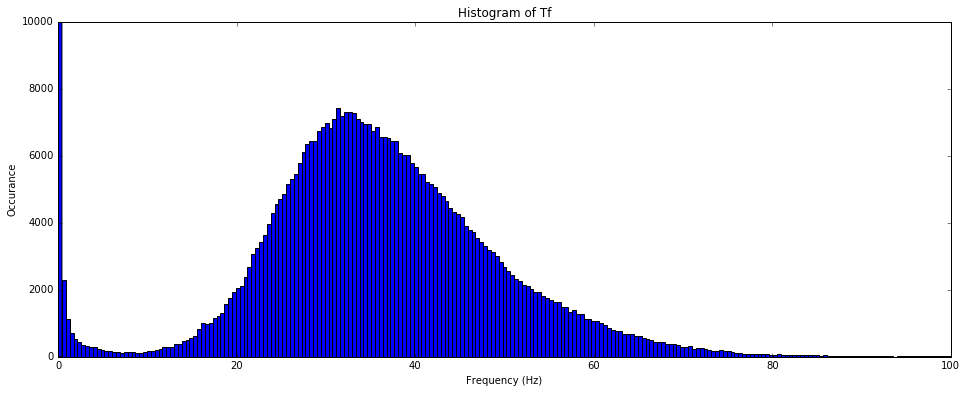

In [4]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(16,6,))
ax = fig.add_subplot(1,1,1)
plt.hist(array.ravel(), bins='auto', range=(0, 100))#Ravel makes a 1D array from a 2D, {{1,2}, {3,4}} = {1,2,3,4}
plt.title('Histogram of Tf')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Occurance')
plt.ylim(0, 10000)
plt.show()


# Analyzing data

According to Elburg, we should open each files "Tf, Ts, E" and compare those files with the probability distance

In [9]:
from scipy import stats
from IPython.display import clear_output

dirList = getDirList(False)
maxSize = len(dirList)
outputArray = np.zeros((maxSize, maxSize))
# outputArray.shape

for i, dir1 in enumerate(dirList):
    # the [i::] of the upper triangle could work, but then the index "j" doenst represent the correct value, therefore i+j
    for  j, dir2 in enumerate(dirList[i::]):
        outputArray[i][j+i] = compareData(dir1,dir2,'Tf')
        outputArray[j+i][i] = outputArray[i][j+i]
        clear_output()
        print 'dir1: ' + str(i) + '\tdir2: '+ str(j+i)


dir1: 99	dir2: 99


In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.spatial.distance as ssd

#Saving the data
np.savez_compressed('dataArray.npz', outputArray)




In [17]:
npzfilename=os.path.join('/home/dennis/Dennis/' + 'dataArray.npz')
dataRaw = np.load(npzfilename) 
dataRaw=dataRaw['arr_0']
dataRaw.shape

(100, 100)

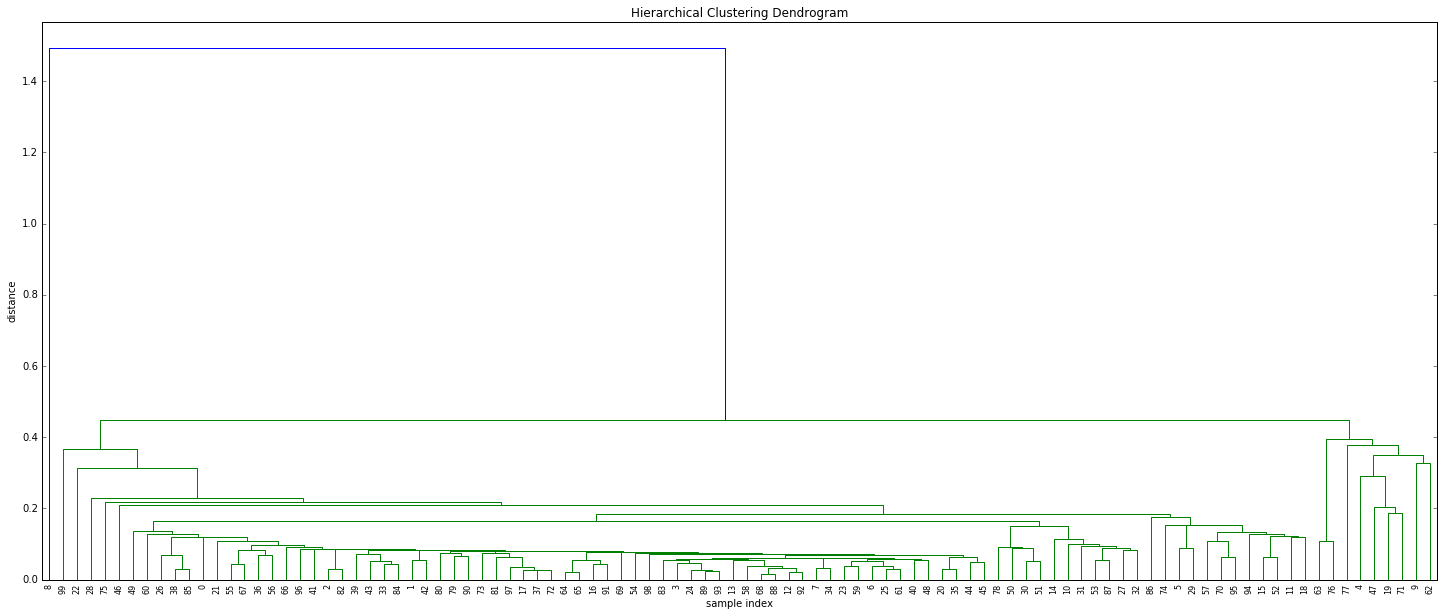

In [18]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    linkage(dataRaw),
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [20]:
dirList = getDirList(False)
print dirList[8]

bells
